<a href="https://colab.research.google.com/github/MYQJaim3/Command_Line_Testing/blob/main/Mercado_Libre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [29]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-23-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [24]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [27]:
# Slice the data to May 2020
may_2020 = df_mercado_trends.loc['2020-05']

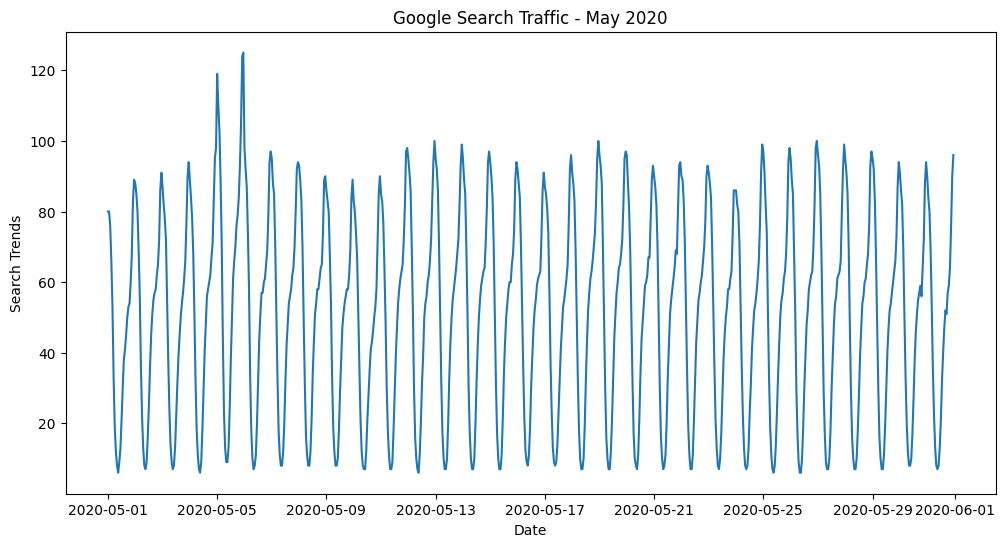

In [32]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(may_2020.index, may_2020['Search Trends'])
plt.title("Google Search Traffic - May 2020")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.savefig('may_2020_plot.png')
plt.show()

In [31]:
# Calculate total search traffic for May 2020
may_2020_total = may_2020['Search Trends'].sum()

In [34]:
# Calculate median monthly traffic across all months
monthly_median = df_mercado_trends.resample('M')['Search Trends'].sum().median()

# Compare May 2020 to the median
difference = may_2020_total - monthly_median
percent_change = (difference / monthly_median) * 100

print(f"May 2020 total search traffic: {may_2020_total}")
print(f"Median monthly search traffic: {monthly_median}")
print(f"Difference: {difference}")
print(f"Percent change: {percent_change:.2f}%")

May 2020 total search traffic: 38181
Median monthly search traffic: 35172.5
Difference: 3008.5
Percent change: 8.55%


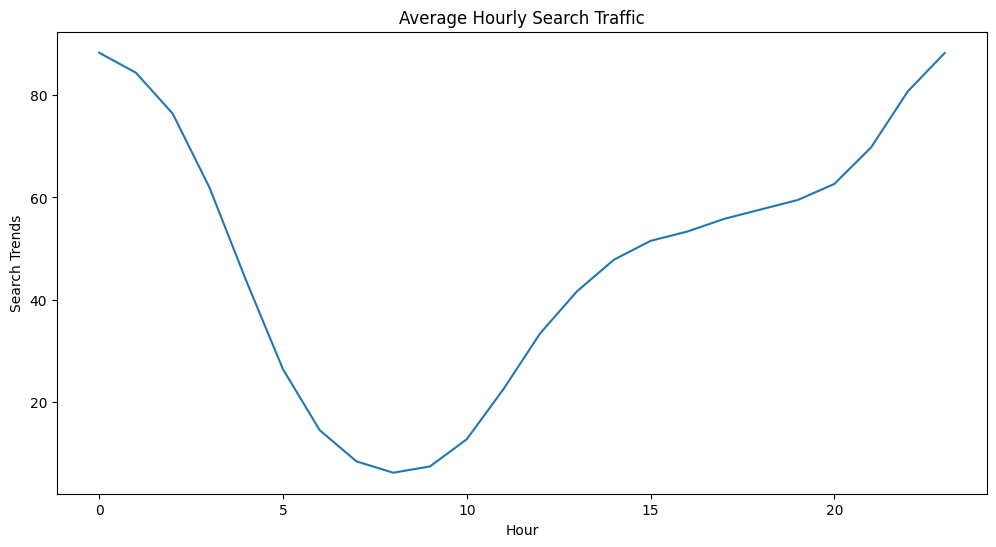

In [37]:
# Group by hour
hourly_average = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_average.index, hourly_average['Search Trends'])
plt.title("Average Hourly Search Traffic")
plt.xlabel("Hour")
plt.ylabel("Search Trends")
plt.savefig('hourly_plot.png')
plt.show()

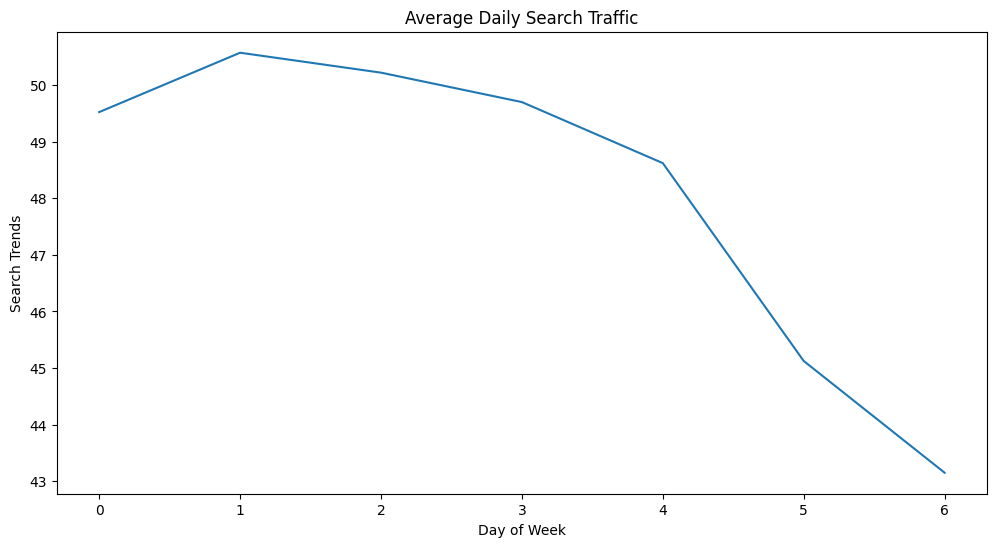

In [38]:
# Group by day of week
daily_average = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_average.index, daily_average['Search Trends'])
plt.title("Average Daily Search Traffic")
plt.xlabel("Day of Week")
plt.ylabel("Search Trends")
plt.savefig('daily_plot.png')
plt.show()

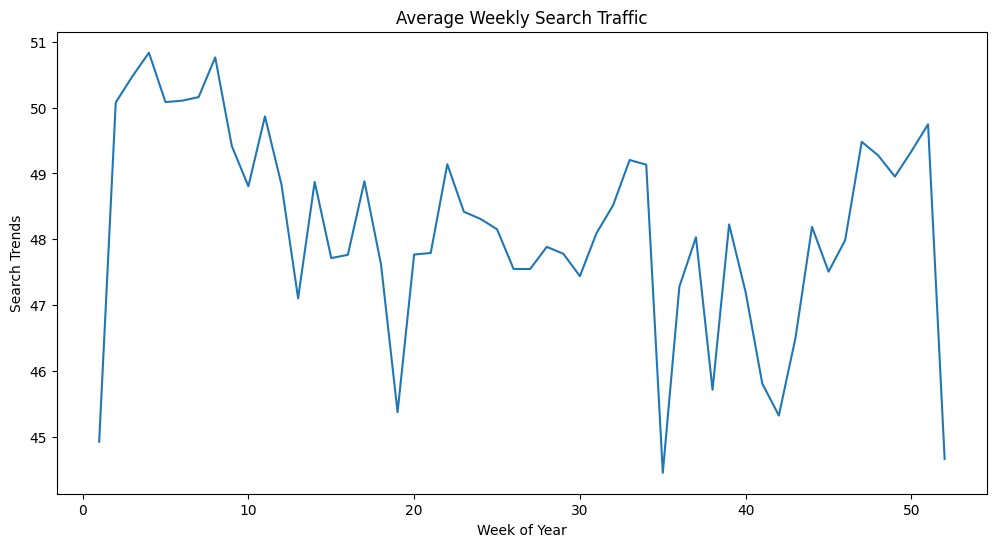

In [39]:
# Group by week of year
weekly_average = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()
plt.figure(figsize=(12, 6))
plt.plot(weekly_average.index, weekly_average['Search Trends'])
plt.title("Average Weekly Search Traffic")
plt.xlabel("Week of Year")
plt.ylabel("Search Trends")
plt.savefig('weekly_plot.png')
plt.show()

In [41]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


from matplotlib import pyplot as plt
_df_0['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [42]:
# Concatenate stock price data to search data
df_combined = pd.concat([df_mercado_trends, df_mercado_stock], axis=1)

In [45]:
# Slice data to first half of 2020
df_2020 = df_combined.loc['2020-01':'2020-06']

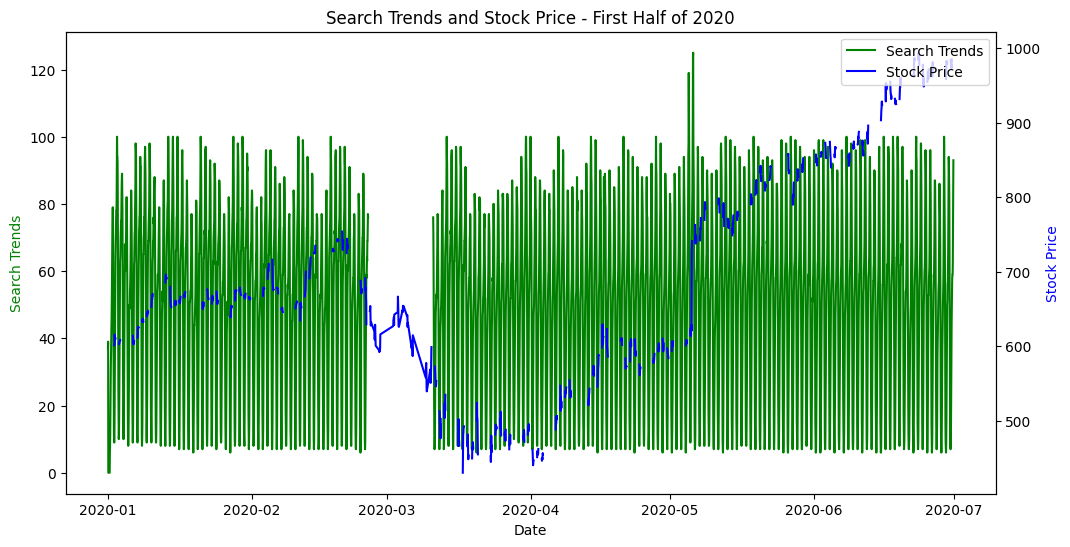

In [55]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(df_2020.index, df_2020['Search Trends'], 'g-', label='Search Trends')
ax2.plot(df_2020.index, df_2020['close'], 'b-', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Search Trends', color='g')
ax2.set_ylabel('Stock Price', color='b')
plt.title("Search Trends and Stock Price - First Half of 2020")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [48]:
# Create lagged search trends
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

In [57]:
# Create stock volatility
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

<ipython-input-57-71399b884af7>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()


In [58]:
# Create hourly stock return
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

<ipython-input-58-57a7b0de61b5>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()


In [59]:
# Calculate correlations
correlation_volatility = df_combined['Lagged Search Trends'].corr(df_combined['Stock Volatility'])
correlation_returns = df_combined['Lagged Search Trends'].corr(df_combined['Hourly Stock Return'])

print(f"Correlation between lagged search trends and stock volatility: {correlation_volatility:.2f}")
print(f"Correlation between lagged search trends and hourly stock returns: {correlation_returns:.2f}")

Correlation between lagged search trends and stock volatility: -0.25
Correlation between lagged search trends and hourly stock returns: -0.02
